In [2]:
import numpy as np
from scipy import stats # importando scipy.stats
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

**Los objetivos de hoy son:**

1- **Extraer las siguentes estadísiticas del conjunto de datos para varias de las varibles disponibles:**

-Utilizando métodos de pandas: media, mediana, moda, máximo y mínimo

In [3]:
df = pd.read_csv("/mnt/d/Descargas/Python/Modulo 2/Pair Programming 2/2019.csv")
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [4]:
df_proyecto = df[["GDP per capita", "Perceptions of corruption"]]
df_proyecto.head(3)

,GDP per capita,Perceptions of corruption
0,1.340,0.393
1,1.383,0.410
2,1.488,0.341


In [23]:
def funcion (columna):
    if (columna[0] > "A") and (columna [0] <= "J"):
        return "primer grupo"
    elif (columna[0] > "K") and (columna [0] <= "P"):
        return "segundo grupo"
    elif (columna[0] > "Q") and (columna [0] <= "Z"):
        return "tercer grupo"

df["Group of countries"] = df["Country or region"].apply(funcion)
df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,col_nuevo,Group of countries
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,primer grupo,primer grupo
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,primer grupo,primer grupo
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,segundo grupo,segundo grupo
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,primer grupo,primer grupo
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,segundo grupo,segundo grupo
...,...,...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,tercer grupo,tercer grupo
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,tercer grupo,tercer grupo
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,None,None
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,primer grupo,primer grupo


In [6]:
gdp = df["GDP per capita"]
corrupcion = df["Perceptions of corruption"]

In [7]:
print(gdp.describe()) # describe muestra un resumen con los estadísticos más comunes para el dataframe 
print(gdp.cumsum()) # suma acumulada por columnas
print(gdp.mean()) # media aritmética de cada columna


count    156.000000
mean       0.905147
std        0.398389
min        0.000000
25%        0.602750
50%        0.960000
75%        1.232500
max        1.684000
Name: GDP per capita, dtype: float64
0        1.340
1        2.723
2        4.211
3        5.591
4        6.987
        ...   
151    140.045
152    140.521
153    140.871
154    140.897
155    141.203
Name: GDP per capita, Length: 156, dtype: float64
0.9051474358974363


In [8]:
print(corrupcion.describe()) # describe muestra un resumen con los estadísticos más comunes para el dataframe 
print(corrupcion.cumsum()) # suma acumulada por columnas
print(corrupcion.mean()) # media aritmética de cada columna


count    156.000000
mean       0.110603
std        0.094538
min        0.000000
25%        0.047000
50%        0.085500
75%        0.141250
max        0.453000
Name: Perceptions of corruption, dtype: float64
0       0.393
1       0.803
2       1.144
3       1.262
4       1.560
        ...  
151    16.956
152    17.103
153    17.128
154    17.163
155    17.254
Name: Perceptions of corruption, Length: 156, dtype: float64
0.11060256410256411


-Percentiles 25, 75

In [9]:
percentil25gdp = np.percentile(gdp, 25, axis=None, out=None, overwrite_input=False, interpolation='linear', keepdims=False)
percentil25gdp

0.60275

In [10]:
percentil75gdp = np.percentile(gdp, 75, axis=None, out=None, overwrite_input=False, interpolation='linear', keepdims=False)
percentil75gdp

1.2325000000000002

In [11]:
percentil25corru = np.percentile(corrupcion, 25, axis=None, out=None, overwrite_input=False, interpolation='linear', keepdims=False)
percentil25corru

0.047

In [12]:
percentil75corru = np.percentile(corrupcion, 75, axis=None, out=None, overwrite_input=False, interpolation='linear', keepdims=False)
percentil75corru

0.14125

-Rango Intercualtílico

In [13]:
# Calculamos los percentiles 75 y 25 (que serían el primer y tercer cuartil)
q3, q1 = np.percentile(gdp, [75, 25])
# Calculamos el rango intercuartílico como la resta de los valores del tercer y primer cuartil
riqgdp = q3 - q1
print("El rango intercuartílico es:", riqgdp)

El rango intercuartílico es: 0.6297500000000001


In [14]:
# Calculamos los percentiles 75 y 25 (que serían el primer y tercer cuartil)
q3, q1 = np.percentile(corrupcion, [75, 25])
# Calculamos el rango intercuartílico como la resta de los valores del tercer y primer cuartil
riqcorru = q3 - q1
print("El rango intercuartílico es:", riqcorru)

El rango intercuartílico es: 0.09424999999999999


-Boxplot de algunas variables

Text(0.5, 0, 'GDP                                                                Corrupcion')

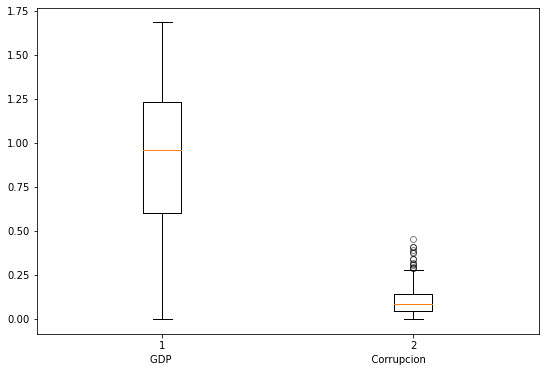

In [15]:
# Creando el objeto figura con matplotlib
fig = plt.figure(1, figsize=(9, 6))

# Creando el subgrafico al que añadiremos el grafico de cajas
ax = fig.add_subplot(111)

# Creando el grafico de cajas
bp = ax.boxplot(df_proyecto)

# Visualizar mas facilmente los datos atípicos
# En 'fliers' se guardan aquellos datos que se encuentran más aislados de los demás (outliers)
for flier in bp['fliers']:
    flier.set(marker='o', color='red', alpha=0.5) # Los dibujamos con un marcador especial

ax.set_xlabel(xlabel='GDP                                                                Corrupcion')

-Tabla de frecuencias

--Variables cualitativas

In [16]:
df.describe(include="O")

,Country or region
count,156
unique,156
top,Finland
freq,1


In [34]:
# Primero agrupamos el dataframe por la columna.
df_country = df.groupby("Group of countries",) #Devolvera un objeto DataFrameGroupBy
print(df_country)
# Aplicamos el método agg para agregar los datos por la columa.
frecuencias_pais = df_country.agg(frecuencia=("Group of countries", "count")).T
# Imprimimos por pantalla el resultado de la agrupación y agregación
print(frecuencias_pais)

Group of countries  primer grupo  segundo grupo  tercer grupo
frecuencia                    61             40            41


--Variables cuantitativas

In [35]:
cuantitativa_gdp = df.groupby("Group of countries")
cuantitativa_gdp1 =  cuantitativa_gdp.agg(frecuencia=("Group of countries", "count"))
cuantitativa_gdp1

,frecuencia
Group of countries,
primer grupo,61
segundo grupo,40
tercer grupo,41


In [38]:
# df["sepal_length_group"] = pd.cut(df["sepal_length"], bins=5)
# iris_sepal = iris.groupby("sepal_length_group")
# iris_sepal_lengths =  iris_sepal.agg(frecuencia=("sepal_length", "count"))
# print(iris_sepal_lengths)

--Frecuencia acumulada

In [ ]:
bins = np.arange(4, 8+0.5, 0.5)

iris["sepal_length_group"] = pd.cut(iris["sepal_length"], bins=bins)

iris["sepal_length_group"] = pd.cut(iris["sepal_length"], bins=bins)
iris_sepal = iris.groupby("sepal_length_group")
iris_sepal_lengths =  iris_sepal.agg(frecuencia=("sepal_length", "count"))
#Calculamos una nueva columna del DataFrame llamada frecuencia acumulada usando cumsum() sobre la frecuencia
iris_sepal_lengths["frecuencia_acumulada"] = iris_sepal_lengths["frecuencia"].cumsum()
#Visualizamos el dataframe resultado
iris_sepal_lengths

--Representación de al menos una tabla de frecuencias

<AxesSubplot:xlabel='Group of countries'>

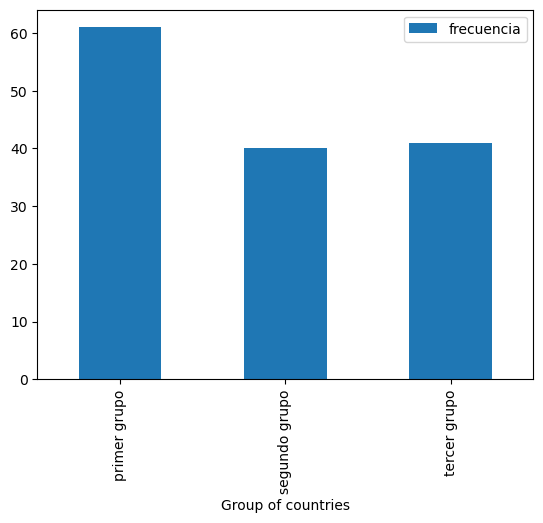

In [37]:
plt.rcdefaults()

# Aplicamos el método agg para agregar los datos por la columa species.
frecuencias_paises = df_country.agg(frecuencia=("Group of countries", "count")) 
# Pandas nos proporciona el metodo plot.bar() para hacer un gráfico de barras de manera sencilla
frecuencias_paises.plot.bar()

2. **Interpretación de los resultados.**

-Ahora interpreta los resultados obtenidos de los diferentes estadísticos estudiados haciendo incapié en aspectos interesantes de tus datos y explica lo mejor posible la naturaleza de los mismos.